<a href="https://colab.research.google.com/github/saurabhsinghrawat/ML_Project-1/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules and Fetching Dataset

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

In [ ]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

## We Get data, target, feature_names(pixel1-pixel784), target_names, DESCR

In [ ]:
x , y = mnist['data'], mnist['target']

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

##The test digit is taken here

In [ ]:
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)   #we have to reshape it to plot it

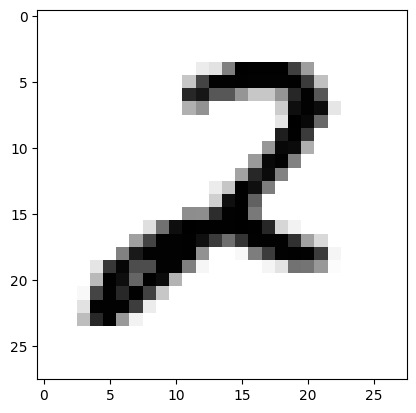

In [ ]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")

In [ ]:
y[36001]

'2'

In [ ]:
x_train, x_test = x[: 60000], x[60000:]

In [ ]:
y_train, y_test = y[:60000], y[60000:]

In [ ]:
import numpy as np

In [ ]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

##Creating a 2 Detector

In [ ]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [ ]:
y_train

57534    7
4893     7
43750    9
6764     2
50877    7
        ..
794      6
40412    0
28524    1
2343     5
56163    0
Name: class, Length: 60000, dtype: int8

In [ ]:
y_test

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: int8

In [ ]:
y_train_2

57534    False
4893     False
43750    False
6764      True
50877    False
         ...  
794      False
40412    False
28524    False
2343     False
56163    False
Name: class, Length: 60000, dtype: bool

In [ ]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [ ]:
clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring = 'accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
a.mean()

0.9783499999999999